In [2]:
# Load packages
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import scipy as scp
import scipy.stats as scps
import pickle
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime
import time
import scipy.optimize as scp_opt
from scipy.stats import mode
from statsmodels.distributions.empirical_distribution import ECDF

In [14]:
 = pd.read_csv('/Users/afengler/OneDrive/project_nn_likelihoods/data/kde/ddm/keras_models/dnnregressor_ddm_09_26_20_08_52_12/training_history.csv')

SyntaxError: invalid syntax (<ipython-input-14-1f803ef70863>, line 1)

In [44]:
import yaml

model = 'full_ddm2'

with open('model_paths_home.yaml') as tmp_file:
    file_path = yaml.load(tmp_file)[model]

data = pd.read_csv(file_path + '/training_history.csv', index_col = 0)

/Users/afengler/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


In [33]:
data

,loss,mse,val_loss,val_mse,lr
0,0.269876,2.161350,0.050792,0.170229,1.000000e-03
1,0.040600,0.134833,0.035664,0.115130,1.000000e-03
2,0.028822,0.097451,0.026687,0.090311,1.000000e-03
3,0.023138,0.079803,0.020548,0.072329,1.000000e-03
4,0.020178,0.070506,0.018899,0.066948,1.000000e-03
5,0.018625,0.065988,0.017675,0.063579,1.000000e-03
6,0.017756,0.063745,0.017270,0.062443,1.000000e-03
7,0.017181,0.062326,0.017108,0.062701,1.000000e-03
8,0.016776,0.061399,0.016311,0.060441,1.000000e-03
9,0.016476,0.060754,0.016262,0.060407,1.000000e-03


In [7]:
file_path

'model_paths_home.yaml'

In [24]:
data

,loss,mse,val_loss,val_mse,lr
0,0.119945,0.857518,0.018113,0.056179,1.000000e-03
1,0.015208,0.046914,0.013141,0.041626,1.000000e-03
2,0.012213,0.038514,0.011638,0.037344,1.000000e-03
3,0.011105,0.035652,0.010507,0.034521,1.000000e-03
4,0.010544,0.034212,0.010163,0.033615,1.000000e-03
5,0.010199,0.033322,0.011421,0.036281,1.000000e-03
6,0.009651,0.032032,0.009629,0.032190,1.000000e-04
7,0.009590,0.031858,0.009586,0.032030,1.000000e-04
8,0.009523,0.031687,0.009536,0.031959,1.000000e-05
9,0.009512,0.031663,0.009530,0.031925,1.000000e-06


In [45]:
def loss_curves(loss_panda = [],
                save = True,
                machine = 'home',
                model = 'ddm',
                plot_format = 'svg'):
    
    matplotlib.rcParams['text.usetex'] = True
    matplotlib.rcParams['svg.fonttype'] = 'none'
    
    sns.set(style = 'white',
            palette = 'muted',
            color_codes = True,
            font_scale = 2)
    
    fig, ax = plt.subplots(1, 1, 
                           figsize = (10, 10),
                           sharex = False,
                           sharey = False)
    
    my_suptitle = fig.suptitle('DDM LIKELIHOOD EVALUATION ON SINGLE DATASETS')
    
    sns.despine(right = True)
    
    xs = [i for i in range(len(loss_panda['loss'].values))]

    # HUBER
    ax.plot(xs, loss_panda['loss'],
            label = 'Huber-train',
            color = 'black',
            alpha = 0.5)
    ax.plot(xs, loss_panda['val_loss'],
            label = 'Huber-val',
            color = 'black',
            linestyle = 'dashed')
    
    # MSE
    ax.plot(xs, loss_panda['mse'],
            color = 'blue',
            label = 'MSE-train',
            alpha = 0.5)
    ax.plot(xs, loss_panda['val_mse'],
            color = 'blue',
            label = 'MSE-val',
            linestyle = 'dashed')
    
    ax.set_xlabel('Epoch', size = 28)
    ax.set_ylabel('Loss', size = 28)
    ax.tick_params(labelsize = 24)
    
    ax.legend()
    
    
    
    if save == True:
        if machine == 'home':
            fig_dir = "/users/afengler/OneDrive/git_repos/nn_likelihoods/figures/mlp/loss_curves/"
            if not os.path.isdir(fig_dir):
                os.mkdir(fig_dir)

        if plot_format == 'png':
            plt.savefig(fig_dir + '/' + 'loss_curve_mlp_' + model + '.png', 
                        dpi = 300, 
                        transparent = False,
                        bbox_inches = 'tight',
                        bbox_extra_artists = [my_suptitle])
        if plot_format == 'svg':
            plt.savefig(fig_dir + '/' + 'loss_curve_mlp_' + model + '.svg',
                            format = 'svg', 
                            transparent = True,
                            bbox_inches = 'tight',
                            bbox_extra_artists = [my_suptitle],
                            frameon = False)

    #plt.close()
    
          
    plt.show()

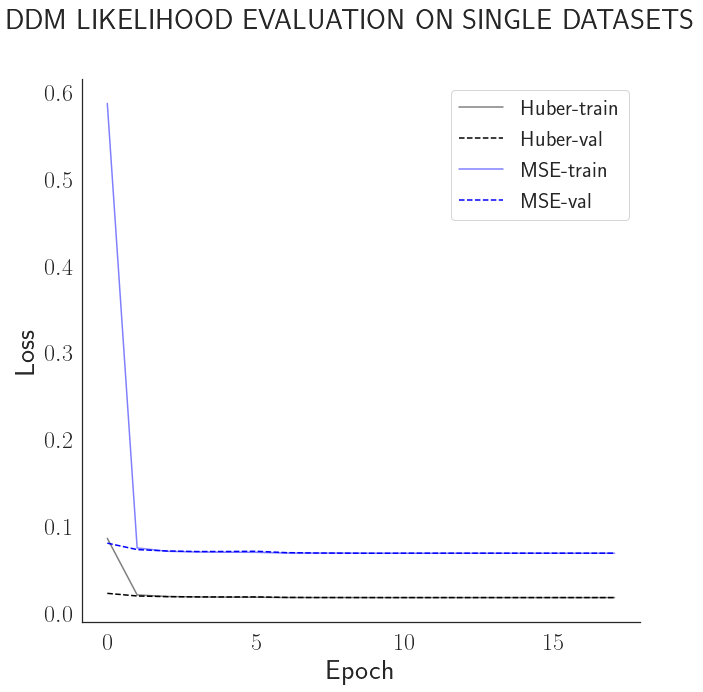

In [46]:
loss_curves(loss_panda = data,
            model = model)

In [16]:
def forward_timings(mean_timings = None, # list [timings_cnn_1024, timings_cnn_4096, timings_mlp_1024, timings_mlp_4096]
                    machine = 'home',
                    save = False,
                    plot_format = 'svg'):
    
    matplotlib.rcParams['text.usetex'] = True
    #matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['svg.fonttype'] = 'none'
    
    sns.set(style = "white", 
            palette = "muted", 
            color_codes = True,
            font_scale = 2)

    fig, ax = plt.subplots(1, 1, 
                           figsize = (10, 10), 
                           sharex = False, 
                           sharey = False)
    
    my_suptitle = fig.suptitle('DDM LIKELIHOOD EVALUATION ON SINGLE DATASETS', 
                               fontsize = 32)
    
    sns.despine(right = True)
    
    for col in mean_timings.keys():
        if col == 'nsamples' or col == 'lognsamples':
            continue
        if col == 'CNN':
            color_tmp = 'red'
        if col == 'MLP':
            color_tmp = 'blue'
        if col == 'MLP-Numpy':
            color_tmp = 'aqua'
            continue
        if col == '100k-sim':
            color_tmp = 'aqua'
        if col == 'Navarro Fuss':
            color_tmp = 'violet'
        
        ax.scatter(mean_timings['lognsamples'].values, 
                   mean_timings[col].values,
                   color = color_tmp,
                   marker = 's',
                   label = col)
        ax.set_xlabel('log2 Data Set Size')
        ax.set_ylabel('Time in ms')
    
        
#         plt.scatter(mean_timings['nsamples'].values, mean_timings[col].values,
#                  label = col)

    ax.legend()
           
#     ax.scatter(x_cnn_4096, np.array([i for i in range(len(plot_vals['CNN-4096'].keys()))]) + offset_list[3], 
#                c = 'red',
#                marker = 's',
#                alpha = .5,
#                label = 'CNN-1024')
                        
    if save == True:
        if machine == 'home':
            fig_dir = "/users/afengler/OneDrive/git_repos/nn_likelihoods/figures/timings/"
            if not os.path.isdir(fig_dir):
                os.mkdir(fig_dir)
        
        if plot_format == 'png':
            plt.savefig(fig_dir + '/' + 'timings_batch_1' +  '.png', 
                        dpi = 300, 
                        transparent = False,
                        bbox_inches = 'tight',
                        bbox_extra_artists = [my_suptitle])
        if plot_format == 'svg':
            plt.savefig(fig_dir + '/' + 'timings_batch_1' +  '.svg',
                            format = 'svg', 
                            transparent = True,
                            bbox_inches = 'tight',
                            bbox_extra_artists = [my_suptitle],
                            frameon = False)
        
        plt.close()
    
    # Show
        return #plt.show(block = False)
    else:
        return plt.show()

,loss,mse,val_loss,val_mse,lr
0,0.119945,0.857518,0.018113,0.056179,1.000000e-03
1,0.015208,0.046914,0.013141,0.041626,1.000000e-03
2,0.012213,0.038514,0.011638,0.037344,1.000000e-03
3,0.011105,0.035652,0.010507,0.034521,1.000000e-03
4,0.010544,0.034212,0.010163,0.033615,1.000000e-03
5,0.010199,0.033322,0.011421,0.036281,1.000000e-03
6,0.009651,0.032032,0.009629,0.032190,1.000000e-04
7,0.009590,0.031858,0.009586,0.032030,1.000000e-04
8,0.009523,0.031687,0.009536,0.031959,1.000000e-05
9,0.009512,0.031663,0.009530,0.031925,1.000000e-06


In [3]:
import boundary_functions as bf

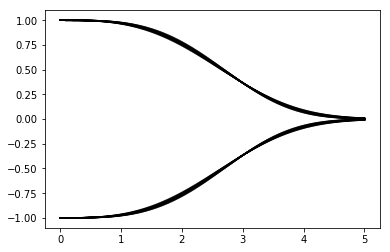

In [18]:
for a in np.linspace(3.0, 3.5, 100):
    out = bf.weibull_cdf(t = np.linspace(0.01, 5 , 1000), alpha = a, beta = 3)
    plt.plot(np.linspace(0, 5 , 1000), out, alpha = 0.1, c = 'black')
    plt.plot(np.linspace(0, 5, 1000), - out, alpha = 0.1, c = 'black')

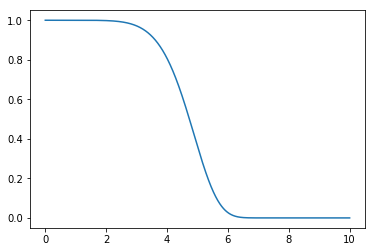

In [14]:
plt.plot(np.linspace(0, 10 , 1000), out)

In [56]:
np.exp( - np.power( np.divide(t, beta), alpha))

array([nan,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0